<a href="https://colab.research.google.com/github/selfhiam/Machine-Learning-Homework/blob/main/%08%ED%95%9C%EA%B5%AD%EC%96%B4_%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [77]:
import json
import csv
import pandas as pd
import numpy as np

# json형식을 csv로 변경

In [78]:
f = open('/content/drive/MyDrive/KDT v2/9. 자연어 처리/data/media.json', 'r', encoding='utf-8')
data = json.load(f)
f.close()

csv_file = open('/content/drive/MyDrive/KDT v2/9. 자연어 처리/data/media.csv', 'w', newline='', encoding='utf-8')
w = csv.writer(csv_file)

w.writerow(data[0].keys())

for i in data :
    w.writerow(i.values())

csv_file.close()

In [79]:
df = pd.read_csv('/content/drive/MyDrive/KDT v2/9. 자연어 처리/data/media.csv')
df

,id,sentence,tokens,sense_no,source
0,2984691,일단 1화 보니까 이번 가을 수성의 마녀와 함께 최고의 기대작인듯ㅋㅋㅋ,"[{'start': 31, 'length': 3, 'sub': '기대작', 'fac...",1,{'uri': 'https://bbs.ruliweb.com/community/boa...
1,3616918,교통 문제가 너무 심각한데 이걸 해결할 생각이 없나.,"[{'start': 0, 'length': 5, 'sub': '교통 문제', 'fa...",1,{'uri': 'https://bbs.ruliweb.com/community/boa...
2,1711609,이게 전부 새벽의 저주를 너무 잘찍어서 그럼 그 다음에 300으로 영상미 끝장내버리...,"[{'start': 6, 'length': 6, 'sub': '새벽의 저주', 'f...",1,{'uri': 'https://bbs.ruliweb.com/community/boa...
3,3326957,인터넷에는 잉여력 넘치는 사람들이 많아서 그냥 따라만 해도 할수있게 설명한게 많음,"[{'start': 6, 'length': 3, 'sub': '잉여력', 'face...",1,{'uri': 'https://bbs.ruliweb.com/community/boa...
4,3639614,우리 아버지는 제철업계에서 유명한 거물이야.,"[{'start': 8, 'length': 4, 'sub': '제철업계', 'fac...",1,{'uri': 'https://bbs.ruliweb.com/community/boa...
...,...,...,...,...,...
67731,2978348,조선에는 일본 구헌법이 안 적용된 건 쏙 빼먹네.,"[{'start': 8, 'length': 3, 'sub': '구헌법', 'face...",1,{'uri': 'https://bbs.ruliweb.com/community/boa...
67732,2869630,맵이 하나뿐인 지역이었던지라 채팅하다 죽을거 같아서 글도 못썼네요.,"[{'start': 16, 'length': 4, 'sub': '채팅하다', 'fa...",1,{'uri': 'https://bbs.ruliweb.com/community/boa...
67733,3238628,오리 농법 봉하쌀의 대량 생산화에 매진 중이라고 한다.,"[{'start': 14, 'length': 3, 'sub': '생산화', 'fac...",1,{'uri': 'https://bbs.ruliweb.com/community/boa...
67734,3642618,남편이 자유 근로자라 휴가 스케줄을 잡기가 어려워.,"[{'start': 4, 'length': 6, 'sub': '자유 근로자', 'f...",1,{'uri': 'https://bbs.ruliweb.com/community/boa...


In [80]:
# 필요없는 컬럼 삭제
df.drop(['id', 'tokens', 'sense_no', 'source'], axis=1, inplace=True)

df

,sentence
0,일단 1화 보니까 이번 가을 수성의 마녀와 함께 최고의 기대작인듯ㅋㅋㅋ
1,교통 문제가 너무 심각한데 이걸 해결할 생각이 없나.
2,이게 전부 새벽의 저주를 너무 잘찍어서 그럼 그 다음에 300으로 영상미 끝장내버리...
3,인터넷에는 잉여력 넘치는 사람들이 많아서 그냥 따라만 해도 할수있게 설명한게 많음
4,우리 아버지는 제철업계에서 유명한 거물이야.
...,...
67731,조선에는 일본 구헌법이 안 적용된 건 쏙 빼먹네.
67732,맵이 하나뿐인 지역이었던지라 채팅하다 죽을거 같아서 글도 못썼네요.
67733,오리 농법 봉하쌀의 대량 생산화에 매진 중이라고 한다.
67734,남편이 자유 근로자라 휴가 스케줄을 잡기가 어려워.


In [81]:
# 결측치 삭제
df = df.dropna().reset_index(drop=True)
print(f'필터링된 데이터셋 총 개수 : {len(df)}')

필터링된 데이터셋 총 개수 : 67736


In [82]:
# 2차원 배열을 1차원 배열로 변경

df_values = [i[0] for i in df.values]

In [83]:
# 데이터 프레임에 데이터 삽입

df = pd.DataFrame({'sentence':df_values})

df

,sentence
0,일단 1화 보니까 이번 가을 수성의 마녀와 함께 최고의 기대작인듯ㅋㅋㅋ
1,교통 문제가 너무 심각한데 이걸 해결할 생각이 없나.
2,이게 전부 새벽의 저주를 너무 잘찍어서 그럼 그 다음에 300으로 영상미 끝장내버리...
3,인터넷에는 잉여력 넘치는 사람들이 많아서 그냥 따라만 해도 할수있게 설명한게 많음
4,우리 아버지는 제철업계에서 유명한 거물이야.
...,...
67731,조선에는 일본 구헌법이 안 적용된 건 쏙 빼먹네.
67732,맵이 하나뿐인 지역이었던지라 채팅하다 죽을거 같아서 글도 못썼네요.
67733,오리 농법 봉하쌀의 대량 생산화에 매진 중이라고 한다.
67734,남편이 자유 근로자라 휴가 스케줄을 잡기가 어려워.


In [84]:
# 중복된 데이터 삭제
processed_df = df.drop_duplicates(['sentence']).reset_index(drop=True)
processed_df

,sentence
0,일단 1화 보니까 이번 가을 수성의 마녀와 함께 최고의 기대작인듯ㅋㅋㅋ
1,교통 문제가 너무 심각한데 이걸 해결할 생각이 없나.
2,이게 전부 새벽의 저주를 너무 잘찍어서 그럼 그 다음에 300으로 영상미 끝장내버리...
3,인터넷에는 잉여력 넘치는 사람들이 많아서 그냥 따라만 해도 할수있게 설명한게 많음
4,우리 아버지는 제철업계에서 유명한 거물이야.
...,...
67529,조선에는 일본 구헌법이 안 적용된 건 쏙 빼먹네.
67530,맵이 하나뿐인 지역이었던지라 채팅하다 죽을거 같아서 글도 못썼네요.
67531,오리 농법 봉하쌀의 대량 생산화에 매진 중이라고 한다.
67532,남편이 자유 근로자라 휴가 스케줄을 잡기가 어려워.


In [85]:
# 특수문자 제거
processed_df['sentence'] = processed_df['sentence'].str.replace('[^a-zA-Z0-9가-힣]', ' ', regex=True)
processed_df

,sentence
0,일단 1화 보니까 이번 가을 수성의 마녀와 함께 최고의 기대작인듯
1,교통 문제가 너무 심각한데 이걸 해결할 생각이 없나
2,이게 전부 새벽의 저주를 너무 잘찍어서 그럼 그 다음에 300으로 영상미 끝장내버리...
3,인터넷에는 잉여력 넘치는 사람들이 많아서 그냥 따라만 해도 할수있게 설명한게 많음
4,우리 아버지는 제철업계에서 유명한 거물이야
...,...
67529,조선에는 일본 구헌법이 안 적용된 건 쏙 빼먹네
67530,맵이 하나뿐인 지역이었던지라 채팅하다 죽을거 같아서 글도 못썼네요
67531,오리 농법 봉하쌀의 대량 생산화에 매진 중이라고 한다
67532,남편이 자유 근로자라 휴가 스케줄을 잡기가 어려워


In [86]:
# 단어의 길이가 2글자 이하인 데이터 제거

processed_df['sentence'] = processed_df['sentence'].apply(lambda x: ' '.join([token for token in x.split() if len(token) > 2]))
processed_df

,sentence
0,보니까 수성의 마녀와 최고의 기대작인듯
1,문제가 심각한데 해결할 생각이
2,새벽의 저주를 잘찍어서 다음에 300으로 영상미 끝장내버리니까 이후로 능력이상의 맡게됨
3,인터넷에는 잉여력 넘치는 사람들이 많아서 따라만 할수있게 설명한게
4,아버지는 제철업계에서 유명한 거물이야
...,...
67529,조선에는 구헌법이 적용된 빼먹네
67530,하나뿐인 지역이었던지라 채팅하다 죽을거 같아서 못썼네요
67531,봉하쌀의 생산화에 중이라고
67532,남편이 근로자라 스케줄을 잡기가 어려워


In [94]:
# 전체 문장이 100자 이하거나 전체 단어의 갯수가 7개 이하인 데이터를 필터링

processed_news_df = processed_df[processed_df.sentence.apply(lambda x: len(str(x)) > 100 and len(str(x).split()) > 7)].reset_index(drop=True)
processed_news_df

,sentence
0,일본제국의 대소신료들과 장병들은 선조들로부터 물려받은 과업을 것임과 근원을 신속히 ...
1,16일 NHK 보도에 따르면 북한에서 발사된 탄도미사일에 정부는 12시 32분과 3...
2,코믹스 메니아 아니더라도 슈퍼맨 슈퍼맨과 배트맨다운 배트맨을 페이즈1에서 보여주고 ...
3,복지사각지대 불평등 문제가 세계적인 과제로 대두된 상황에서 지금의 복지제도만으로는 ...
4,암모니아는 뽑아다 수소를 합성해서 만드는 메탄올은 이산화탄소를 뽑아다 수소를 합성해...
...,...
370,이러한 문제점을 개선하기 프랑스 육군은 방침을 변경해 기아나로 외인부대원에게 이런저...
371,그러나 정권의 실수를 되짚어보고 개선할 무엇인가 알아보는것이 정권이 경제학 망했으니...
372,이전까지는 니루가 구성될 예컨대 전쟁등이 일어나면 10명의 장정들로 니루를 임시로 ...
373,멀티버스에서 동일하게 스트레인지가 스트레인지가 되려면 뭔가를 잃어야만 하는게 절대적...


In [95]:
# 불용어를 제거 하면서 단어 분리
text = open('/content/drive/MyDrive/KDT v2/9. 자연어 처리/data/stopword.txt', 'r', encoding='utf-8')
stop_words = text.read()

tokenized_doc = processed_news_df['sentence'].apply(lambda x: x.split())
tokenized_doc = tokenized_doc.apply(lambda x: [s_word for s_word in x if s_word not in stop_words])

tokenized_doc

0      [일본제국의, 대소신료들과, 장병들은, 선조들로부터, 물려받은, 과업을, 것임과, ...
1      [16일, NHK, 보도에, 따르면, 북한에서, 발사된, 탄도미사일에, 정부는, 1...
2      [코믹스, 메니아, 아니더라도, 슈퍼맨, 슈퍼맨과, 배트맨다운, 배트맨을, 페이즈1...
3      [복지사각지대, 불평등, 문제가, 세계적인, 과제로, 대두된, 상황에서, 지금의, ...
4      [암모니아는, 뽑아다, 수소를, 합성해서, 만드는, 메탄올은, 이산화탄소를, 뽑아다...
                             ...                        
370    [문제점을, 개선하기, 프랑스, 육군은, 방침을, 변경해, 기아나로, 외인부대원에게...
371    [정권의, 실수를, 되짚어보고, 개선할, 무엇인가, 알아보는것이, 정권이, 경제학,...
372    [이전까지는, 니루가, 구성될, 전쟁등이, 일어나면, 10명의, 장정들로, 니루를,...
373    [멀티버스에서, 동일하게, 스트레인지가, 스트레인지가, 되려면, 뭔가를, 잃어야만,...
374    [경기가, 회복될, 조짐을, 보이고, 있지만, 코로나바이러스, 사례가, 세계적으로,...
Name: sentence, Length: 375, dtype: object

In [96]:
# 리스트로 변경
tokenized_doc = tokenized_doc.to_list()
len(tokenized_doc)

375

In [97]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(tokenized_doc)

# 단어를 인덱스와 매칭하여 딕셔너리 형태로
tokenizer.word_index

{'필요한': 1,
 '있습니다': 2,
 '있다고': 3,
 '그대로': 4,
 '못하고': 5,
 '있어서': 6,
 '있으며': 7,
 '우리가': 8,
 '다양한': 9,
 '하는데': 10,
 '있지만': 11,
 '나중에': 12,
 '경우에는': 13,
 '있는데': 14,
 '수많은': 15,
 '것으로': 16,
 '가지고': 17,
 '문제가': 18,
 '상황에서': 19,
 '새로운': 20,
 '있다는': 21,
 '생각함': 22,
 '코로나': 23,
 '관련된': 24,
 '대부분': 25,
 '가능한': 26,
 '나오는': 27,
 '힌두교': 28,
 '자신의': 29,
 '그들의': 30,
 '따르면': 31,
 '슈퍼맨': 32,
 '생활을': 33,
 '한다고': 34,
 '그나마': 35,
 '이상의': 36,
 '자기가': 37,
 '빠르게': 38,
 '아무리': 39,
 '방식으로': 40,
 '영향을': 41,
 '이것도': 42,
 '역할을': 43,
 '사람이': 44,
 '고양이': 45,
 '제대로': 46,
 '차이가': 47,
 '프랑스': 48,
 '100': 49,
 '사회적': 50,
 '사실상': 51,
 '아닐까': 52,
 '수준의': 53,
 '과정에서': 54,
 '태어난': 55,
 '정보를': 56,
 '밝혔다': 57,
 '갑자기': 58,
 '애초에': 59,
 '가운데': 60,
 '상태로': 61,
 '사실을': 62,
 '했는데': 63,
 '중요한': 64,
 '통해서': 65,
 '대규모': 66,
 '있어도': 67,
 '현실적으로': 68,
 '20세기': 69,
 '정확한': 70,
 '사람들이': 71,
 '그것도': 72,
 '물건에': 73,
 '소유권': 74,
 '실제로': 75,
 '이해가': 76,
 '아시아': 77,
 '기술을': 78,
 '것입니다': 79,
 '우리의': 80,
 '바탕으로': 81,
 '합니다': 82,
 '보여주는': 83,
 

In [98]:
word2idx = tokenizer.word_index

# 키와 벨류 위치를 변경
idx2word = {value:key for key, value in word2idx.items()}
# print(idx2word)

# 토큰화 된걸 문장에 인코딩
encoded = tokenizer.texts_to_sequences(tokenized_doc)
print(encoded)

[[222, 724, 725, 726, 727, 728, 729, 730, 731, 90, 222, 732, 733, 734, 735, 223, 736, 90, 737, 738, 17, 7, 30, 739, 740, 741], [224, 742, 743, 31, 744, 745, 746, 747, 748, 749, 750, 751, 752, 91, 753, 754, 56, 225, 755, 226, 756, 57], [757, 758, 759, 32, 760, 761, 762, 763, 764, 765, 766, 767, 768, 769, 770, 32, 771, 772, 773, 774, 32, 775, 92, 776, 58, 777, 227, 778, 779, 780], [781, 782, 18, 783, 784, 785, 19, 228, 786, 787, 3, 788, 789, 790, 791, 792, 33, 229, 20, 793, 794, 34, 795, 796], [230, 231, 232, 233, 93, 234, 94, 231, 232, 233, 93, 234, 797, 798, 799, 800, 801, 802, 230, 59, 235, 803, 804, 236, 1, 805, 806, 807, 808, 809], [810, 237, 811, 812, 813, 814, 95, 815, 96, 816, 817, 818, 819, 820, 821, 822, 97, 823, 824, 825, 826], [827, 238, 828, 829, 830, 60, 831, 239, 832, 833, 834, 98, 835, 836, 3, 837, 838, 240, 839, 840, 241, 841, 842, 242, 843, 844, 845, 846], [847, 848, 849, 850, 851, 852, 853, 854, 243, 855, 856, 857, 35, 858, 859, 860, 861, 862, 863, 864, 865, 866, 867, 

In [138]:
vocab_size = len(word2idx) + 1

print(f'단어사전의 크기 : {vocab_size}')

단어사전의 크기 : 7750


In [139]:
# 첫번째 문장 보기
print(encoded[0])

[222, 724, 725, 726, 727, 728, 729, 730, 731, 90, 222, 732, 733, 734, 735, 223, 736, 90, 737, 738, 17, 7, 30, 739, 740, 741]


In [140]:
# skipgrams = 중심으로 부터 주변 단어 예측
from tensorflow.keras.preprocessing.sequence import skipgrams

# 학습을 할때 이런 단어로 학습을 진행해라 라고 한것.
skip_grams = [skipgrams(sample, vocabulary_size = vocab_size, window_size=10) for sample in encoded]

print(f'전체 샘플 수 : {len(skip_grams)}')

전체 샘플 수 : 375


In [141]:
pairs, labels = skip_grams[0][0], skip_grams[0][1]

print(f'3 pairs: {pairs[:3]}')
# 긍정적 예 : 실제 텍스트에서 중심단어와 주변단어가 함께 등장한 경우(1)
# 부정적 예 : 중심 단어와 실제 텍스트에서 함께 등장하지 않은 단어(0)

print(f'3 labels: {labels[:3]}')

3 pairs: [[726, 6156], [735, 1762], [735, 729]]
3 labels: [0, 0, 1]


In [142]:
# 전체 개수 확인
print(len(pairs))
print(len(labels))

820
820


In [143]:
for i in range(5):
    print('({:s} ({:d}), {:s} ({:d})) => {:d}'.format(
        idx2word[pairs[i][0]], pairs[i][0],
        idx2word[pairs[i][1]], pairs[i][1],
        labels[i]
    ))

(선조들로부터 (726), 뉴스에선 (6156)) => 0
(영원한 (735), 소독하고 (1762)) => 0
(영원한 (735), 것임과 (729)) => 1
(정착시킬 (736), 자신감과 (737)) => 1
(것임과 (729), 동아시아에 (734)) => 1


In [144]:
# 전체데이터 학습 돌리기
training_dataset = [skipgrams(sample, vocabulary_size = vocab_size, window_size=10) for sample in encoded]
len(training_dataset)

375

In [145]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Embedding, Reshape, Activation, Input, Dot
from tensorflow.keras.utils import plot_model

In [146]:
# 중심 단어를 위한 임베딩 테이블
embedding_dim = 100

# 숫자 타입으로 Input 객체 만들어서
w_inputs = Input(shape=(1,), dtype='int32')
word_embedding = Embedding(vocab_size, embedding_dim)(w_inputs)

c_inputs = Input(shape=(1,), dtype='int32')
context_embedding = Embedding(vocab_size, embedding_dim)(c_inputs)

In [147]:
# 행렬곱

dot_product = Dot(axes=2)([word_embedding, context_embedding])

dot_product = Reshape((1,), input_shape=(1, 1))(dot_product)

output = Activation('sigmoid')(dot_product)

model = Model(inputs=[w_inputs, c_inputs], outputs=output)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 1)]                  0         []                            
                                                                                                  
 input_4 (InputLayer)        [(None, 1)]                  0         []                            
                                                                                                  
 embedding_2 (Embedding)     (None, 1, 100)               775000    ['input_3[0][0]']             
                                                                                                  
 embedding_3 (Embedding)     (None, 1, 100)               775000    ['input_4[0][0]']             
                                                                                            

In [148]:
model.compile(loss='binary_crossentropy', optimizer='adam')

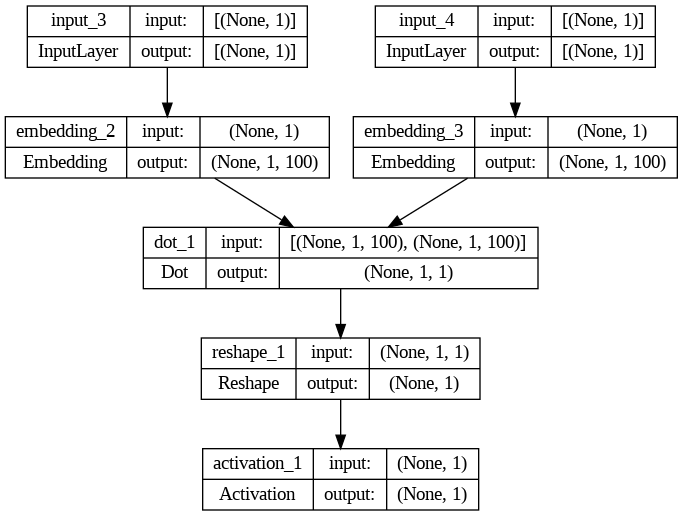

In [149]:
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [150]:
for epoch in range(100):
    loss = 0
    for _, elem in enumerate(training_dataset):
        first_elem = np.array(list(zip(*elem[0]))[0], dtype='int32')
        second_elem = np.array(list(zip(*elem[0]))[1], dtype='int32')
        labels = np.array(elem[1], dtype='int32')
        X = [first_elem, second_elem]
        Y = labels
        loss += model.train_on_batch(X, Y)
    print('Epoch:', epoch+1, 'Loss:', loss)

Epoch: 1 Loss: 259.92738449573517
Epoch: 2 Loss: 257.07641553878784
Epoch: 3 Loss: 249.80538761615753
Epoch: 4 Loss: 234.85135474801064
Epoch: 5 Loss: 212.3269613981247
Epoch: 6 Loss: 185.31822589039803
Epoch: 7 Loss: 157.82118380069733
Epoch: 8 Loss: 132.80154493451118
Epoch: 9 Loss: 111.4092608988285
Epoch: 10 Loss: 93.48248988389969
Epoch: 11 Loss: 78.4148975238204
Epoch: 12 Loss: 65.64294146001339
Epoch: 13 Loss: 54.76101514697075
Epoch: 14 Loss: 45.49045257642865
Epoch: 15 Loss: 37.627572651952505
Epoch: 16 Loss: 31.006115462630987
Epoch: 17 Loss: 25.476410964503884
Epoch: 18 Loss: 20.896662279963493
Epoch: 19 Loss: 17.131632778793573
Epoch: 20 Loss: 14.05491359718144
Epoch: 21 Loss: 11.551917297765613
Epoch: 22 Loss: 9.521907232701778
Epoch: 23 Loss: 7.87858359515667
Epoch: 24 Loss: 6.549490174744278
Epoch: 25 Loss: 5.474724177271128
Epoch: 26 Loss: 4.605461563449353
Epoch: 27 Loss: 3.9025649258401245
Epoch: 28 Loss: 3.338032455649227
Epoch: 29 Loss: 2.893504586769268
Epoch: 30 L

In [196]:
import gensim

vectors = model.get_weights()[0]

f = open('vectors.txt', 'w', encoding='utf-8')
f.write('{} {}\n'.format(vocab_size - 1, embedding_dim))

print(vectors)
print(len(vectors))

[[ 0.03791029 -0.04955095  0.01289797 ...  0.03778623  0.02250678
  -0.00728071]
 [-1.1848315   0.01793998 -1.0275701  ... -0.13367014 -0.9774888
  -0.0644054 ]
 [-0.03975775  0.46930507 -1.0696696  ... -0.09447105 -0.2923184
  -0.27964196]
 ...
 [ 0.49016824  0.6768221  -0.5094088  ... -0.53198195  0.65341276
   0.49133345]
 [ 0.02697532  0.5099493  -0.7091048  ... -0.62085456 -0.710445
   0.67825836]
 [ 0.5025727   0.6073172   0.12277222 ... -0.5882777  -0.7970833
   0.6188073 ]]
7750


In [197]:
for word, i in tokenizer.word_index.items() :
    f.write('{} {}\n'.format(word, ' '.join(map(str, list(vectors[i-1,:])))))
f.close()

In [198]:
w2v = gensim.models.KeyedVectors.load_word2vec_format('./vectors.txt', binary=False)

In [200]:
w2v.most_similar(positive=['코로나'])

[('파밍좀', 0.427794873714447),
 ('떨면서', 0.4093891680240631),
 ('jason', 0.3998221457004547),
 ('오버로스트테크놀로지가', 0.3969440460205078),
 ('해양쪽', 0.3863945007324219),
 ('처지를', 0.37610405683517456),
 ('절대적으로', 0.3709789514541626),
 ('나온게', 0.3701239228248596),
 ('초기였으니', 0.36636245250701904),
 ('운운하던데', 0.36176446080207825)]